# 1.Import Libraries

In [25]:
import gensim.downloader as api
import json
from gensim.models.word2vec import Word2Vec

import pandas as pd
import numpy as np

#Kmeans
from sklearn.cluster import KMeans

#T-SNE
from sklearn.manifold import MDS, TSNE

import altair as alt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 2.Download Pretrained Models

### 2.1 See available Models 

In [26]:
info = api.info()
print(json.dumps(info, indent=4))

{
    "corpora": {
        "semeval-2016-2017-task3-subtaskBC": {
            "num_records": -1,
            "record_format": "dict",
            "file_size": 6344358,
            "reader_code": "https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py",
            "license": "All files released for the task are free for general research use",
            "fields": {
                "2016-train": [
                    "..."
                ],
                "2016-dev": [
                    "..."
                ],
                "2017-test": [
                    "..."
                ],
                "2016-test": [
                    "..."
                ]
            },
            "description": "SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collect

In [27]:
model = api.load("word2vec-google-news-300")
#model = api.load("glove-wiki-gigaword-300")
#model = api.load("glove-twitter-25")

In [28]:
model.key_to_index 

{'</s>': 0,
 'in': 1,
 'for': 2,
 'that': 3,
 'is': 4,
 'on': 5,
 '##': 6,
 'The': 7,
 'with': 8,
 'said': 9,
 'was': 10,
 'the': 11,
 'at': 12,
 'not': 13,
 'as': 14,
 'it': 15,
 'be': 16,
 'from': 17,
 'by': 18,
 'are': 19,
 'I': 20,
 'have': 21,
 'he': 22,
 'will': 23,
 'has': 24,
 '####': 25,
 'his': 26,
 'an': 27,
 'this': 28,
 'or': 29,
 'their': 30,
 'who': 31,
 'they': 32,
 'but': 33,
 '$': 34,
 'had': 35,
 'year': 36,
 'were': 37,
 'we': 38,
 'more': 39,
 '###': 40,
 'up': 41,
 'been': 42,
 'you': 43,
 'its': 44,
 'one': 45,
 'about': 46,
 'would': 47,
 'which': 48,
 'out': 49,
 'can': 50,
 'It': 51,
 'all': 52,
 'also': 53,
 'two': 54,
 'after': 55,
 'first': 56,
 'He': 57,
 'do': 58,
 'time': 59,
 'than': 60,
 'when': 61,
 'We': 62,
 'over': 63,
 'last': 64,
 'new': 65,
 'other': 66,
 'her': 67,
 'people': 68,
 'into': 69,
 'In': 70,
 'our': 71,
 'there': 72,
 'A': 73,
 'she': 74,
 'could': 75,
 'just': 76,
 'years': 77,
 'some': 78,
 'U.S.': 79,
 'three': 80,
 'million': 81

In [29]:
model.most_similar('whale', topn = 10)

[('whales', 0.847417950630188),
 ('humpback_whale', 0.7968777418136597),
 ('dolphin', 0.7711714506149292),
 ('humpback', 0.7535837292671204),
 ('minke_whale', 0.7365031242370605),
 ('humpback_whales', 0.7337380051612854),
 ('dolphins', 0.7213870286941528),
 ('humpbacks', 0.7138717174530029),
 ('shark', 0.701144278049469),
 ('orca', 0.7007412314414978)]

# 3. Import Animal Data

### 3.1 Animal Classes

In [30]:
classes_df = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/classes.txt", sep = '\t',header = None, names = ['labels','classes'])
classes_df['word2vec_names'] = classes_df['classes']
classes_df['word2vec_names'] = classes_df['word2vec_names'].str.replace('+','_')
classes_df.at[5,'word2vec_names']='longhaired_cat'
#https://www.science.org/doi/10.1126/sciadv.aap9873
classes_df.at[8,'word2vec_names']='whales'
classes_df.at[9,'word2vec_names']='Siamese_cat'
classes_df.at[23,'word2vec_names']='harp_seals'
classes_df

C:\Users\Abhimanyu Acharya\AppData\Local\Temp\ipykernel_3264\4089494230.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  classes_df['word2vec_names'] = classes_df['word2vec_names'].str.replace('+','_')


,labels,classes,word2vec_names
0,1,antelope,antelope
1,2,grizzly+bear,grizzly_bear
2,3,killer+whale,killer_whale
3,4,beaver,beaver
4,5,dalmatian,dalmatian
5,6,persian+cat,longhaired_cat
6,7,horse,horse
7,8,german+shepherd,german_shepherd
8,9,blue+whale,whales
9,10,siamese+cat,Siamese_cat


### 3.2 Taxonomy

In [31]:
taxonomy_df = pd.read_csv("C:/Dissertation/Data/Mammal Taxonomy/Mammal Taxonomy_noduplicates.csv")
taxonomy_df.head()

,sciName,animal_label,animal_class,mainCommonName,otherCommonNames,class,infraclass,magnorder,superorder,order,...,infraorder,parvorder,superfamily,family,subfamily,tribe,genus,subgenus,biogeographicRealm,CMW_sciName
0,Antilope_cervicapra,1,antelope,Blackbuck,Indian Antelope,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,ARTIODACTYLA,...,PECORA,NaN,NaN,BOVIDAE,ANTILOPINAE,ANTILOPINI,Antilope,NaN,Palearctic,Antilope_cervicapra
1,Ursus_arctos,2,grizzly+bear,Brown Bear,Grizzly Bear|Kodiak Bear,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,CARNIVORA,...,ARCTOIDEA,NaN,URSOIDEA,URSIDAE,URSINAE,NaN,Ursus,NaN,Nearctic|Palearctic,Ursus_arctos
2,Orcinus_orca,3,killer+whale,Killer Whale,Orca,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,ARTIODACTYLA,...,CETACEA,ODONTOCETI,DELPHINOIDEA,DELPHINIDAE,INCERTAE SEDIS,NaN,Orcinus,NaN,Marine,Orcinus_orca
3,Aplodontia_rufa,4,beaver,Mountain Beaver,Boomer|Sewellel|Point Arena Mountain Beaver|Po...,Mammalia,Placentalia,Boreoeutheria,Euarchontoglires,RODENTIA,...,NaN,NaN,NaN,APLODONTIIDAE,NaN,NaN,Aplodontia,NaN,Nearctic,Aplodontia_rufa
4,Canis_familiaris,5,dalmatian,Domestic Dog,Dog|Dingo|Feral Dog|New Guinea Singing Dog|Vil...,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,CARNIVORA,...,CANOIDEA,NaN,NaN,CANIDAE,NaN,NaN,Canis,NaN,Domesticated,Canis_familiaris


# 4. Generate Word2Ven Embeddings for each animal Class

In [32]:
class_kg_embeddings = {}
for classes in classes_df['word2vec_names']:
    class_kg_embeddings.update({classes: model[classes]})    

In [33]:
KG_embeddiongs_df = pd.DataFrame.from_dict(class_kg_embeddings)
KG_embeddiongs_df = KG_embeddiongs_df.T
KG_embeddiongs_df = KG_embeddiongs_df.reset_index()
KG_embeddiongs_df = pd.merge(KG_embeddiongs_df,classes_df, left_on = 'index', right_on = 'word2vec_names')
KG_embeddiongs_df.drop(['index'],1,inplace = True)
KG_embeddiongs_df.to_csv("C:\Dissertation\Data\Processed Data\Word2Vec_continous_vectors.csv")
KG_embeddiongs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,labels,classes,word2vec_names
0,0.053711,0.310547,-0.287109,-0.115234,0.016968,-0.167969,-0.084961,0.056152,-0.077637,0.161133,...,0.257812,0.281250,0.326172,0.033447,0.185547,0.019287,0.101074,1,antelope,antelope
1,-0.006561,0.137695,-0.300781,0.335938,0.016479,0.001007,0.062256,0.217773,0.523438,-0.014282,...,0.134766,0.155273,0.041748,-0.014893,0.210938,-0.094727,0.263672,2,grizzly+bear,grizzly_bear
2,0.184570,0.109375,-0.261719,0.030640,-0.213867,-0.332031,0.197266,0.223633,0.539062,0.091309,...,-0.184570,0.177734,0.150391,0.144531,0.416016,-0.070801,0.126953,3,killer+whale,killer_whale
3,-0.123535,0.217773,-0.578125,0.145508,-0.185547,0.028564,-0.065430,0.229492,0.239258,-0.070801,...,-0.176758,-0.015991,0.034668,0.058838,0.126953,0.205078,-0.005432,4,beaver,beaver
4,-0.075684,-0.006531,-0.410156,0.279297,0.143555,-0.148438,0.099121,-0.027344,0.015747,-0.017212,...,-0.167969,0.201172,-0.081055,0.102539,0.388672,0.013977,-0.019165,5,dalmatian,dalmatian


# 5. K-Means clustering + spatialisation

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


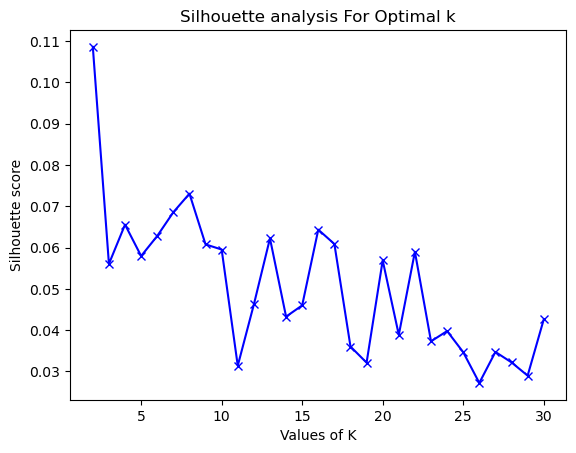

In [34]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30]
silhouette_avg = []
for num_clusters in range_n_clusters: 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(KG_embeddiongs_df.iloc[:,:-3])
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(KG_embeddiongs_df.iloc[:,:-3], cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [35]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 31)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(KG_embeddiongs_df.iloc[:,:-3])
 
    distortions.append(sum(np.min(cdist(KG_embeddiongs_df.iloc[:,:-3], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) /KG_embeddiongs_df.iloc[:,:-3].shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(KG_embeddiongs_df.iloc[:,:-3], kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / KG_embeddiongs_df.iloc[:,:-3].shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


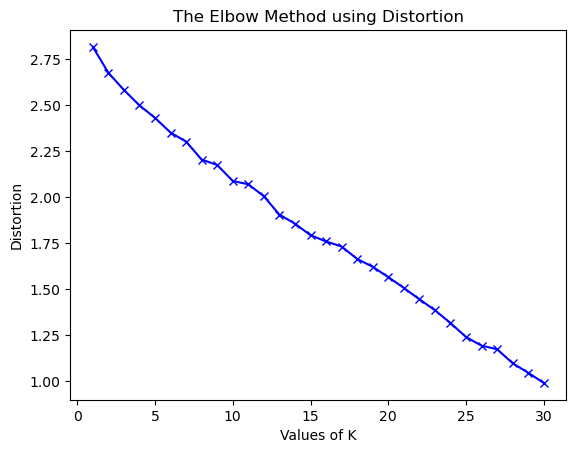

In [36]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

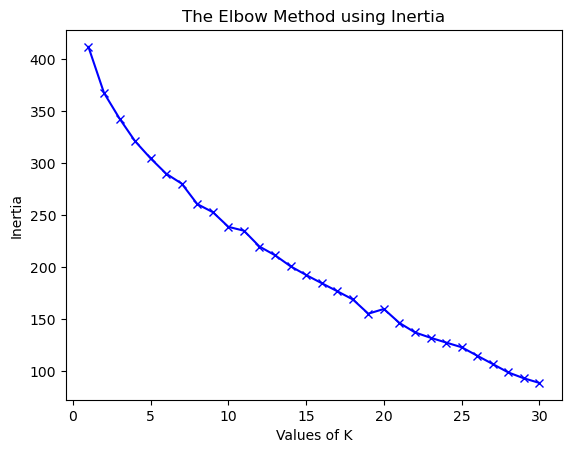

In [37]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [38]:
labels = KG_embeddiongs_df['classes']
kmeans = KMeans(n_clusters=13, random_state=0)
kmeans.fit(KG_embeddiongs_df.iloc[:,:-3])
clusters = kmeans.predict(KG_embeddiongs_df.iloc[:,:-3])
clusters_df = pd.DataFrame(data = clusters
             , columns = ['K_mean'])
clusters_df.head()

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,K_mean
0,4
1,4
2,10
3,2
4,2


In [39]:
tsne = TSNE(n_components=2, random_state = 103, metric = 'euclidean', perplexity=15.0)
#Binary
#tsne_binary = tsne.fit_transform(binary_attributes) 
#tsne_binary_df = pd.DataFrame(data = tsne_binary
             #, columns = ['Binary comp-1', 'Binary comp-2'])

#Continous
tsne_continous= tsne.fit_transform(KG_embeddiongs_df.iloc[:,:-3]) 
tsne_continous_df = pd.DataFrame(data = tsne_continous
             , columns = ['Continous comp-1', 'Continous comp-2'])

#concat
#tsne_binary_df1 = pd.concat([tsne_binary_df, labels], axis = 1)
#tsne_binary_df1 = pd.concat([tsne_binary_df1, animal_type], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df, labels], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, taxonomy_df['order']], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, taxonomy_df['family']], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, clusters_df['K_mean']], axis = 1)

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [40]:
source = tsne_continous_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Continous comp-1:Q',
    y='Continous comp-2:Q',
    color=alt.Color('K_mean:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=10
).encode(
    text='classes:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='K_mean:N'
)

points.interactive() + text1 + text2

alt.LayerChart(...)

In [41]:
source = tsne_continous_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Continous comp-1:Q',
    y='Continous comp-2:Q',
    color=alt.Color('family:N', scale=alt.Scale(scheme='Spectral'))
    ).properties(
    width=800,
    height=800
)

text = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='classes:N'
)

points.interactive() + text

alt.LayerChart(...)

# 6. Convert to Binary Vectors

#### Threshold at 0

In [42]:
b = np.where(KG_embeddiongs_df.iloc[:,:-3]>=0, 1, KG_embeddiongs_df.iloc[:,:-3])
b = np.where(b<0, 0, b)
binary_attributes_df = pd.DataFrame(data = b)
binary_attributes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0


#### Threshold at mean

In [43]:
#mean = np.mean(np.mean(KG_embeddiongs_df.iloc[:,:-3]))
#b = np.where(KG_embeddiongs_df.iloc[:,:-3]>=mean, 1, KG_embeddiongs_df.iloc[:,:-3])
#b = np.where(b<mean, 0, b)
#binary_attributes_df = pd.DataFrame(data = b)
#binary_attributes_df.head()

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


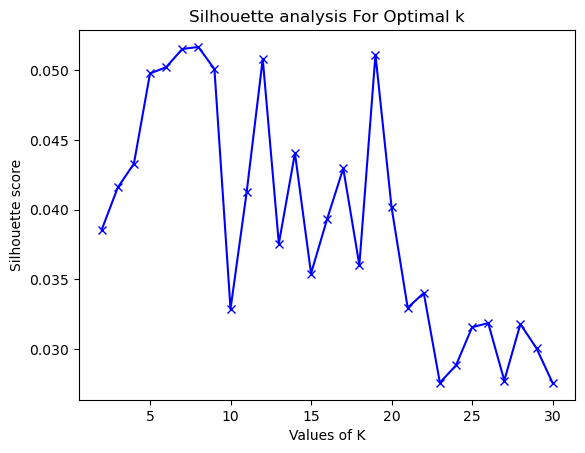

In [44]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30]
silhouette_avg = []
for num_clusters in range_n_clusters: 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(binary_attributes_df)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(binary_attributes_df, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [45]:
labels = KG_embeddiongs_df['classes']
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(binary_attributes_df)
clusters = kmeans.predict(binary_attributes_df)
clusters_df = pd.DataFrame(data = clusters
             , columns = ['K_mean'])
clusters_df.head()

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,K_mean
0,5
1,9
2,8
3,9
4,6


In [46]:
binary_attributes_df = pd.concat([binary_attributes_df, labels], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, taxonomy_df['order']], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, taxonomy_df['family']], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, clusters_df['K_mean']], axis = 1)
binary_attributes_df.to_csv("C:\Dissertation\Data\Processed Data\Word2Vec_binary_vectors.csv")
binary_attributes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,classes,order,family,K_mean
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,antelope,ARTIODACTYLA,BOVIDAE,5
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,grizzly+bear,CARNIVORA,URSIDAE,9
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,killer+whale,ARTIODACTYLA,DELPHINIDAE,8
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,beaver,RODENTIA,APLODONTIIDAE,9
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,dalmatian,CARNIVORA,CANIDAE,6


# 7. Spatialise Binary vectors

In [47]:
tsne = TSNE(n_components=2, verbose=0, random_state=100, metric = 'cosine', perplexity=15.0)
#binary
tsne_binary= tsne.fit_transform(binary_attributes_df.iloc[:,:-4]) 
tsne_binary_df = pd.DataFrame(data = tsne_binary
             , columns = ['binarycomp-1', 'binarycomp-2'])

#concat
tsne_binary_df1 = pd.concat([tsne_binary_df, labels], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['order']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['family']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, clusters_df['K_mean']], axis = 1)

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [48]:
source = tsne_binary_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='binarycomp-1:Q',
    y='binarycomp-2:Q',
    color=alt.Color('K_mean:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='classes:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='K_mean:N'
)

points.interactive() + text1 + text2

alt.LayerChart(...)